## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Reading the dataset and looking to how it is structured
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#The number of rows in the data frame
print("The number of rows in the dataframe is {}.".format(df.shape[0]))

The number of rows in the dataframe is 294478.


c. The number of unique users in the dataset.

In [4]:
#Unique users
n_users = df['user_id'].nunique()
print("There are {} unique users in this dataframe.".format(n_users))

There are 290584 unique users in this dataframe.


d. The proportion of users converted.

In [5]:
#I will let the code right this in order to illustrate how I iterated through the steps of getting the results
# Getting only users that converted
df_conv = df[df['converted'] == True]
#The number of unique users that converted
n_conv = df_conv.shape[0] - (df_conv.shape[0] - df_conv['user_id'].nunique())

#calculating the propability of convertion, and printing it as asked in the quiz.
p_converted = n_conv / n_users
print("The proportion of unique users converted is {}%, from a total of {} unique convertions, and a total of {} unique users.".format(round(p_converted*100, 2), n_conv, n_users))



The proportion of unique users converted is 12.1%, from a total of 35173 unique convertions, and a total of 290584 unique users.


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#Here I did in two completely separated steps
#First step is to get the number of times that a new_page doen't match treatment.
df_new_page = df[df['landing_page'] == 'new_page']
df_miss_group = df_new_page[df_new_page['group'] != 'treatment']

#Second step is to get the number of times treatment doesn't match new_page
df_treatment = df[df['group'] == 'treatment']
df_miss_page = df_treatment[df_treatment['landing_page'] != 'new_page']

#Just summing both values to get the actual result
print("The total number of times 'new_page' and 'treatment' don't match is {}.".format(df_miss_page.shape[0] + df_miss_group.shape[0]))
 


The total number of times 'new_page' and 'treatment' don't match is 3893.


f. Do any of the rows have missing values?

In [7]:
#Getting the info() method to see the summary of the whole dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Using the query method to iterate through the df and build the second dataframe using one step only.
df2 = df.query('group == "control" and landing_page == "old_page" or group == "treatment" and landing_page == "new_page"')
#Just looking at the head of the new dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#Printing the required answer
print("There are {} unique user_ids here." .format(df2['user_id'].nunique()))

There are 290584 unique user_ids here.


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#Getting the information that Python considered to be duplicated, and here
#we know that Python just returns the second occurence of the row, since
#the first time it occured, it was not considered a duplicate
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
#Just to better see all the information, and understand the reasons for this user_id to be 
#duplicated, I used the id number 773192 to retrieve all the information contained in the
#dataframe that are associated with this user.
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#Just using the built-in function dataframe.drop_duplicated() in order to easily drop the
#row associated with the subset(column) user_id that is considered duplicated.
df2.drop_duplicates(subset='user_id', inplace=True)

#just checking if the row was dropped.
df2['user_id'].duplicated().sum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
print("The probability of an individual converting, regardless of the page is {}%.".format(round((sum(df2['converted'] == True) / df2.shape[0])*100, 2)))


The probability of an individual converting, regardless of the page is 11.96%.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df_control = df2[df2['group'] == 'control']

df_control_converted = df_control[df_control['converted'] == True]

print("The probability of an individual that is in the control group, to convert is {}%.".format(round((df_control_converted.shape[0] / df_control.shape[0])*100,2)))

The probability of an individual that is in the control group, to convert is 12.04%.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df_treatment = df2[df2['group'] == 'treatment']

df_treatment_converted = df_treatment[df_treatment['converted'] == True]

print("The probability of convertion for an individual that is in the treatment group is {}%".format(round((df_treatment_converted.shape[0] / df_treatment.shape[0])*100,2)))



The probability of convertion for an individual that is in the treatment group is 11.88%


d. What is the probability that an individual received the new page?

In [17]:
print("The probability of an individual to receive a 'new_page' is {}%.".format(round(df2[df2['landing_page'] == 'new_page'].shape[0] / df2.shape[0]*100, 2)))



The probability of an individual to receive a 'new_page' is 50.01%.


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Absolutely, there is no evidence to support that the new treatment page leads to more conversions.**
Since the probability of each individual to receive a new page is 50%, and the probability of conversion for both groups is nearly the same, we cannot consider this small difference to have any consistent impact in this observation.

A quick note here is that, in the next parts of this notebook, we will evaluate both scenarios taking on consideration other perspectives that can clearly lead to other interpretations, so, I'm answering this question considering only the information obtained above.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<p>H0: $p_{new}$ - $p_{old}$ $\le$ 0</p>
<p>H1: $p_{new}$ - $p_{old}$ $\gt$ 0</p>

<p>The Null hypothesis is when we observe that the difference between the new page and the old page is less than or equal to zero, which means that the associated value for the old page is greater.</p>
<p>On the other hand, we have that the alternative is when this difference that I mentioned above is greater than zero, which means that the value associated with the new page is greater, since we take from it the value associated with the old page and we still have a value greater than zero.</p>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
#Separating both dataframes as we may need to use them separately in later questions.
new_page_df = df[df['landing_page'] == 'new_page']
new_page_rate = new_page_df.query("converted == True").user_id.nunique() / new_page_df.user_id.nunique()

round(new_page_rate,4)


0.1195

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
old_page_df = df[df['landing_page'] == 'old_page']
old_page_rate = old_page_df.query("converted == True").user_id.nunique() / old_page_df.user_id.nunique() #0.1212

old_page_rate = 0.1195
round(old_page_rate, 4)

#The real rate here is also 0.1195, as we can consider both rated to be the same under the null, I'm just showing
#here how I would make the calculations in order to get the rate as I did in the previous question.

0.1195

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
#Just getting the number of unique individuals in both dataframes
n_new = new_page_df[new_page_df['group'] == 'treatment'].user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = old_page_df[old_page_df['group'] == 'control'].user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#Using the random.choice function to simulate, under the specified conditions, what our new
#page converted would be.
new_page_converted = np.random.choice(2, n_new, p=[1-new_page_rate, new_page_rate])


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
#Doing the same with the old page converted, but note that I could also have used the 
#random.binomial function.
old_page_converted = np.random.choice(2, n_old, p=[1-old_page_rate, old_page_rate])


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
#The difference between our alternative and null hypothesis under the specified conditions.
np.mean(new_page_converted) - np.mean(old_page_converted)

-0.00063524118047332545

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
#Simulating 10,000 times the mean difference between our  convertion rates for both pages.
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice(2, n_new, p=[1-new_page_rate, new_page_rate])
    old_page_converted = np.random.choice(2, n_old, p=[1-old_page_rate, old_page_rate])
    p_diffs.append(np.mean(new_page_converted) - np.mean(old_page_converted))
       

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

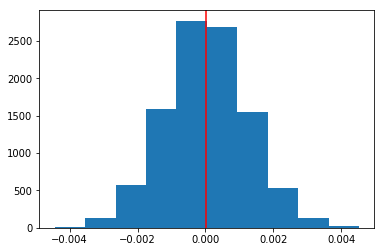

In [26]:
#Defining our observed difference, in order to compare with our distribution.
observed_difference = new_page_rate - old_page_rate

#plotting the distribution, which should be normal and centered near zero.
plt.hist(p_diffs)
plt.axvline(x=observed_difference, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
#As our distriobution is normal and centered near zero, we expect that the proportion
#of values in the distribution that are greater than our observed value to be near 50%, or 0.50
p_diffs = np.array(p_diffs)
(observed_difference < p_diffs).mean()

0.4995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

As we can see from the plot, we have the observed value that probably has come from the null, and saying that we can explain the following:

Since the main goal of the hypothesis testing is to reject the null, here I can say that **we failed to reject the null hypothesis**, as the p_value is greater than our previously established alpha value of 0.05, we cannot reject the null under the circumstances that we have chosen to follow, which is not to have the probability of making a type I error that is greater than 5%.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page'").converted.sum()
convert_new = df2.query("landing_page == 'new_page'").converted.sum()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [29]:
z_stats, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
print("Z-stat is {}, and the p-value is {}.".format(z_stats, p_value))


Z-stat is 1.3109241984234394, and the p-value is 0.18988337448195103.


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The Z-stat here, which has the value of 1.31 tells us that the difference between our variables is 1.31 standard deviations away from the mean, which in fact is less than what we would need to reject the null, so, with this Z-stat here, we failed to reject the null hypothesis.

To make our analysis even stronger, the p-value here is 0.189 which is greater than our threshold that is 0.05, so also considering the p-value, **we still failed to reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

As we are dealing with binary results, or better said, with the evento occuring or not occuring, we can easily perform a **Logistic regression** in order to better fit the model.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
#The dataframe in qurestion before any alterations mentioned in Part III
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [31]:
#Creating the intercept column
df2['intercept'] = 1

#Creating the dummie variables and also dropping the one that we will not use.
df2[['ab_page_', 'ab_page']] = pd.get_dummies(df['group'])
df2 = df2.drop('ab_page_', axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [32]:
#the dataframe after all modifications required
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [33]:
#Importing the complement library needed to run the code below
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

#creating the logistic model and fitting it
logistic_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
#Showing the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        15:50:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [35]:
#As we are dealing with logistic regression, we need to exponentiate the coefficient in order to better
#interpret the information.
print("Intercept: {}, ab_page: {}.".format(np.exp(-1.9888), np.exp(-0.0150)))

Intercept: 0.13685955841614492, ab_page: 0.9851119396030626.


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with ab_page here is 0.190 which, again shows us that, considering this scenario, **we have failed to reject the null.**
The logistic regression is a more accurate prediction model than the sampling distribution of differenced that we used in part II, and also, here we can have much more information and even consider some patterns in order to have some insights.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Using only this dataframe, we could consider the timestamp as a variable that can influence if a individual converts or not, and here I can make this afirmation based on the following:

- Some individuals may have experienced some biased analyses regarding the new model, for example, we could have had some that were impressed only because they were seeing a new page, and this could have influenced them to be willing to convert just because of the impact that the new page generated, disregarding the functionality of the page itself.

- And on the other hand, we could have had the ones that don't like any change in the page, so they probably were more likely to dislike the new page just because they were, in some way, linked with the old design of the page.

So, in order to account for these groups, we should consider the time that they were exposed to this experiment.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
#reading the csv file and storing the content into the dataframe
df_countries = pd.read_csv('countries.csv')
#merging the dataframes.
df2 = df2.merge(df_countries, on='user_id', how='left')

#examining if the merging resulted in the desired dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [37]:
#Just to see all the values under this column.
df2['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [38]:
#Creating the dummy variables.
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])
#checking the values of dummy variables with the column country.
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [47]:
#Creating the logistic model with the values accounting for the three countries in question
logistic_model = sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK']])
results = logistic_model.fit()

#getting the results
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Jan 2021   Pseudo R-squ.:               1.521e-05
Time:                        16:17:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [52]:
#just to better see the coefficients, although we do not use them here.
print("Intercept: {}\n UK: {}\n CA: {} ".format(np.exp(-1.9893), np.exp(0.0099), np.exp(-0.0408)))


Intercept: 0.13679114574153073
 UK: 1.0099491671175422
 CA: 0.9600211149716509 


Looking at the data, we can see that, through the P-values associated with the countries, it seems that both the US  and the UK do not affect the pattern of converting or not a user, or better said, the fact that a user is in the US, or in the UK, weakly relates to the outcome of a conversion.

On the other hand, we can also see that in Canada this seems to have more effect, as the p-values associated with Canada show us that when the user is accessing through there, he/she is more likely to convert.

We also have the coefficients above that can give us some insights, for example, for each unit increase in users that are from Canada, we have almost one more converted user, and here, I'm also considering the p-value that shows me that this variable is somehow significant in order to predict a possible outcome.

Just a note here, we can easily see that all p-values other than the intercept, in this test, are greater than our alpha threshold of 0.05, which implies that, in general, we would **fail to reject the null hypothesis**.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
#Creating the second logistic model, accounting for both, the type of page and countries.
logistic_model = sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK', 'ab_page']])
results = logistic_model.fit()

#getting the results
results.summary()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 15 Jan 2021   Pseudo R-squ.:               2.323e-05
Time:                        16:20:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

In [54]:
#just to better see the coefficients, although we do not use them here.
print("Intercept: {}\n UK: {}\n CA: {}\n ab_page: {} ".format(np.exp(-1.9893), np.exp(0.0099), np.exp(-0.0408), np.exp(-0.0149)))


Intercept: 0.13679114574153073
 UK: 1.0099491671175422
 CA: 0.9600211149716509
 ab_page: 0.9852104557227469 


To summarize better the last analysis, I can say that neither variable was sufficient, in terms of p-values to make us reject the null, indeed, at a conclusion of the analysis, I can say that **we have failed to reject the null** and that we cannot guarantee that the new page was determinant in order to generate more conversions.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0